In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
data = np.load('/home/rneveux/data/BOSS/SGC/pk0pk2pk4bk000_DR12SGC-COMPSAM_V6C_0.50z0.75.npz')

In [5]:
data_pk = np.load('/home/rneveux/data/BOSS/cov_2048_BOSS_DR12_NGC_z3.npy', allow_pickle=True).item()

In [13]:
list(data)

['data_bin_centres',
 'data_bin_coords',
 'data_bin_counts',
 'data_vectors',
 'data_vectors_shotnoise']

In [24]:
repo = '/home/rneveux/mocks/BOSS/SGC/0.50z0.75/'
pk0_n = 'pk0_DR12SGC-COMPSAM_V6C_mean_0.50z0.75.txt'
pk2_n = 'pk2_DR12SGC-COMPSAM_V6C_mean_0.50z0.75.txt'
pk4_n = 'pk4_DR12SGC-COMPSAM_V6C_mean_0.50z0.75.txt'
bk000_n = 'bk000_DR12SGC-COMPSAM_V6C_mean_0.50z0.75.txt'

pk0 = np.zeros((40,2))
pk2 = np.zeros((40,2))
pk4 = np.zeros((40,2))
bk000 = np.zeros((40,2))

pk0[:,0] = data['data_bin_coords'][:40]
pk2[:,0] = data['data_bin_coords'][40:80]
pk4[:,0] = data['data_bin_coords'][80:120]
bk000[:,0] = data['data_bin_coords'][120:160]

m=[]
for i in range(4):
    m.append(np.mean(np.real(data['data_vectors'][:,i*40:(i+1)*40]-data['data_vectors_shotnoise'][:,i*40:(i+1)*40]),axis=0))

pk0[:,1] = m[0]
pk2[:,1] = m[1]
pk4[:,1] = m[2]
bk000[:,1] = m[3]
np.savetxt(repo+pk0_n,pk0)
np.savetxt(repo+pk2_n,pk2)
np.savetxt(repo+pk4_n,pk4)
np.savetxt(repo+bk000_n,bk000)

In [25]:
a = np.loadtxt(repo+pk0_n)

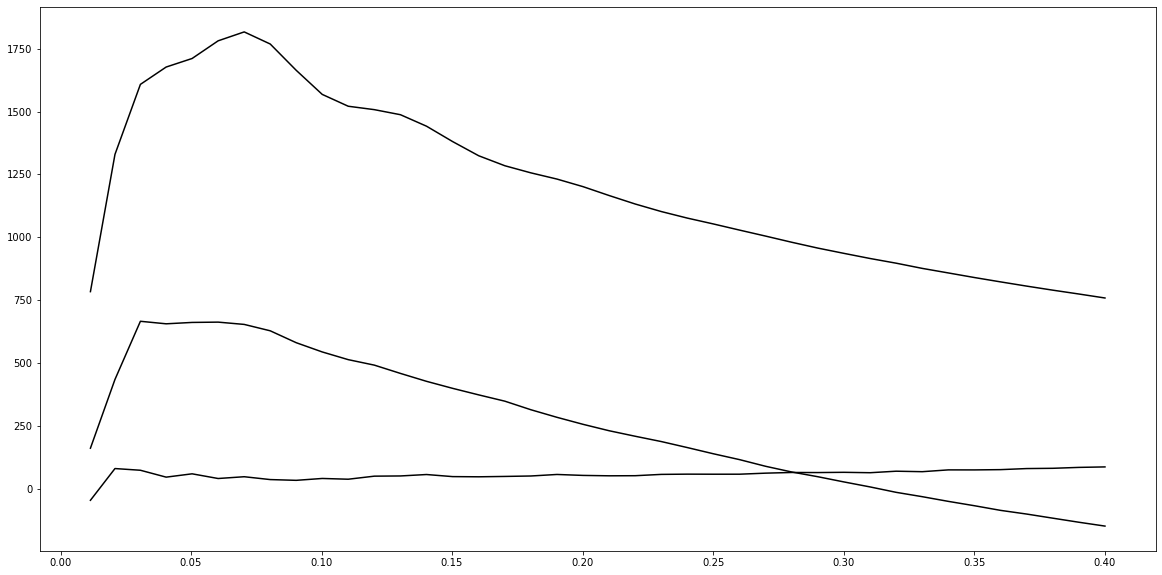

In [26]:
plt.plot(a[:,0],a[:,0]*a[:,1],color='k')
plt.plot(pk2[:,0],pk2[:,0]*pk2[:,1],color='k')
plt.plot(pk4[:,0],pk4[:,0]*pk4[:,1],color='k')

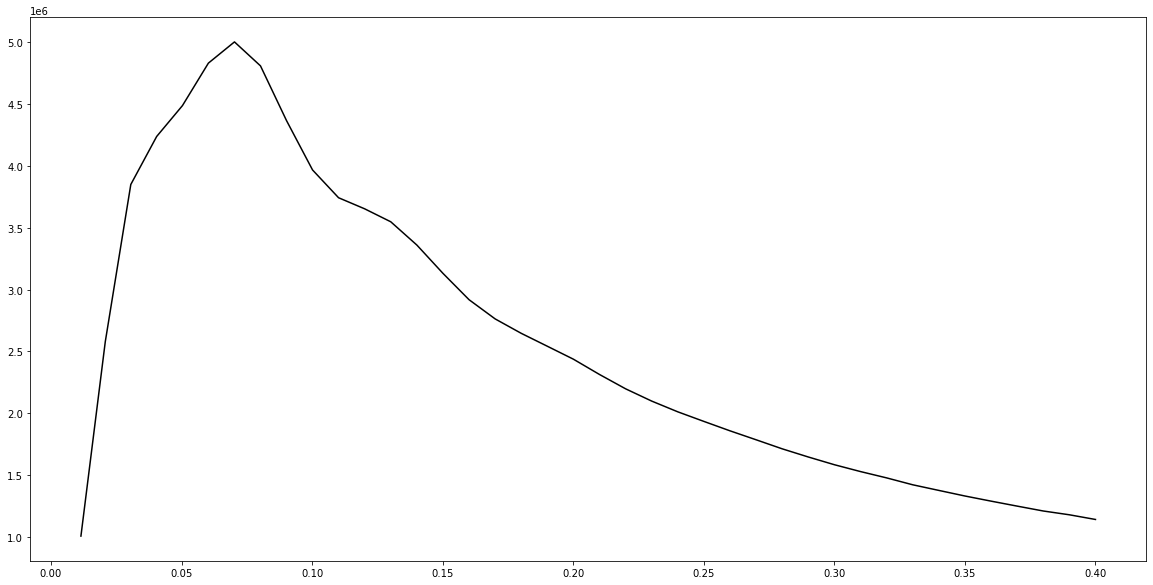

In [21]:
plt.plot(bk000[:,0],bk000[:,0]**2*bk000[:,1],color='k')

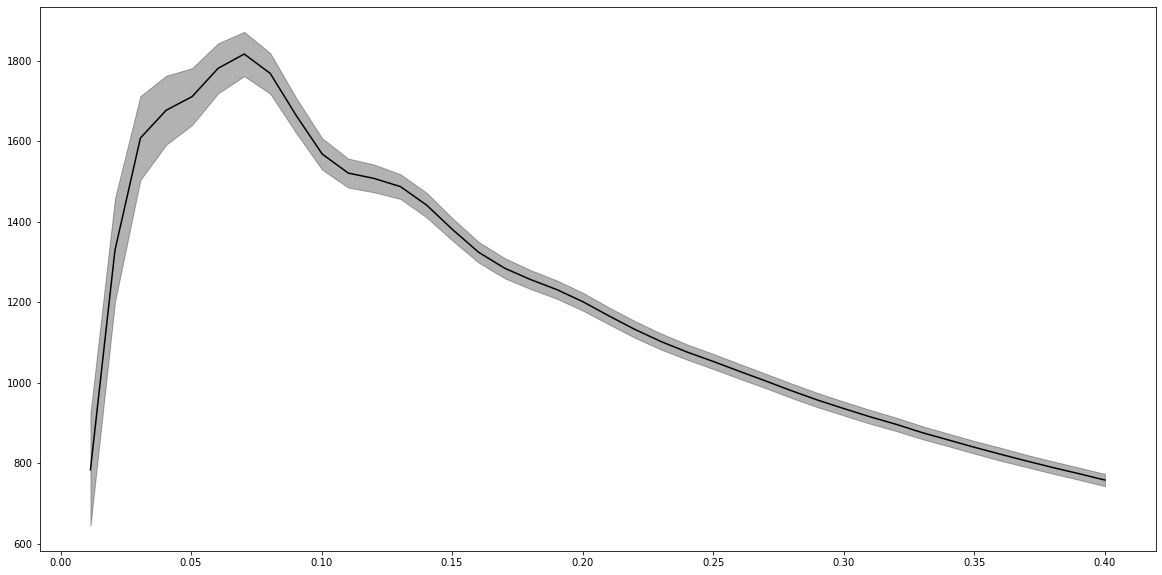

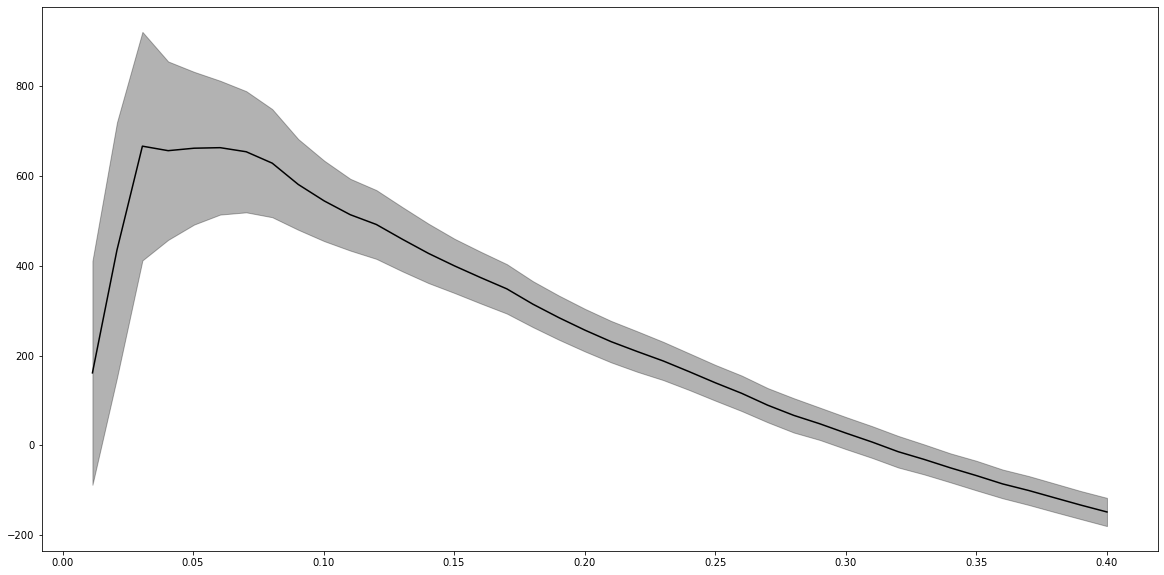

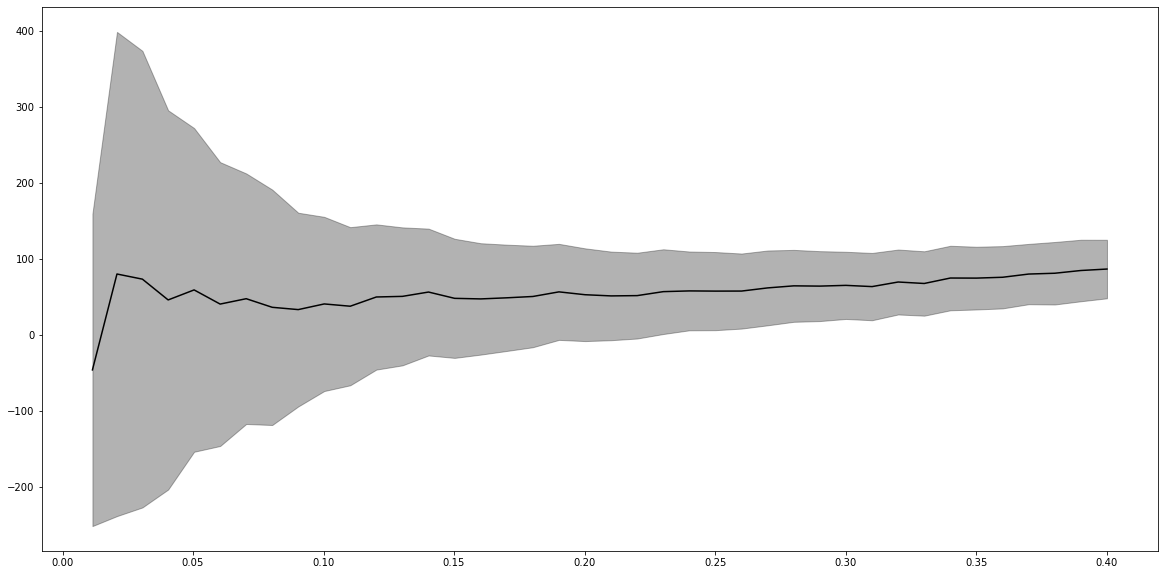

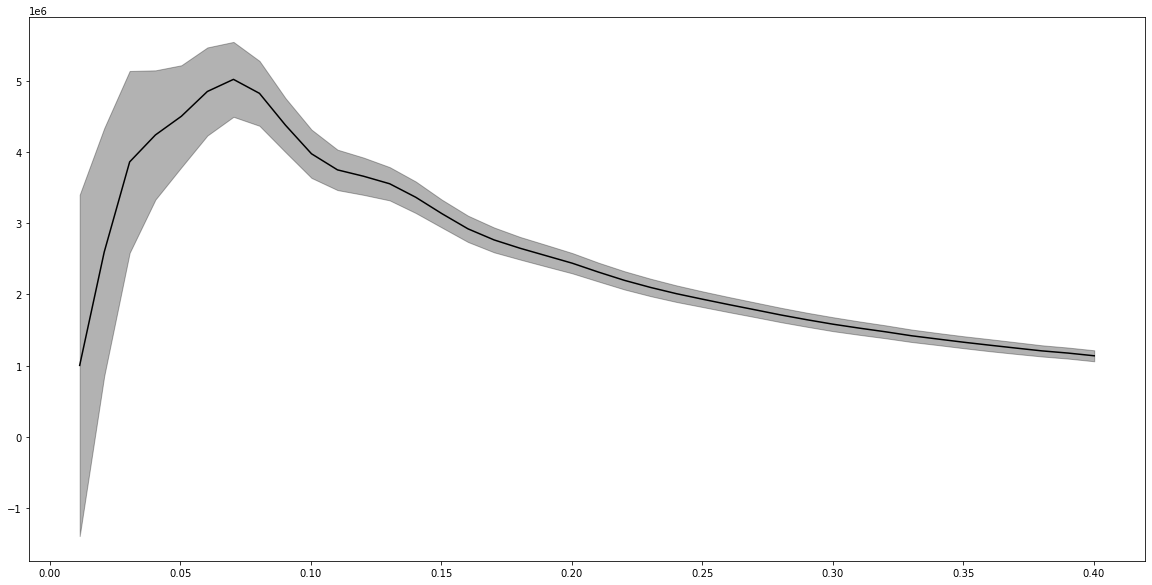

In [3]:
k = data['data_bin_coords'][:40]
for i in range(4):
    m = np.mean(np.real(data['data_vectors'][:,i*40:(i+1)*40]-data['data_vectors_shotnoise'][:,i*40:(i+1)*40]),axis=0)
    s = np.std(np.real(data['data_vectors'][:,i*40:(i+1)*40]-data['data_vectors_shotnoise'][:,i*40:(i+1)*40]),axis=0)
    if i==3:
        plt.plot(k,k**2*m,color='k')
        plt.fill_between(k,k**2*(m-s),k**2*(m+s),color='k',alpha=.3)
    else:
        plt.plot(k,k*m,color='k')
        plt.fill_between(k,k*(m-s),k*(m+s),color='k',alpha=.3)
    plt.show()

In [4]:
cov = np.cov(np.real(data['data_vectors']-data['data_vectors_shotnoise']),rowvar=False)
corr = np.corrcoef(np.real(data['data_vectors']-data['data_vectors_shotnoise']),rowvar=False)
#corr = np.corrcoef(np.real(data['data_vectors']),rowvar=False)

In [5]:
cov.shape

(160, 160)

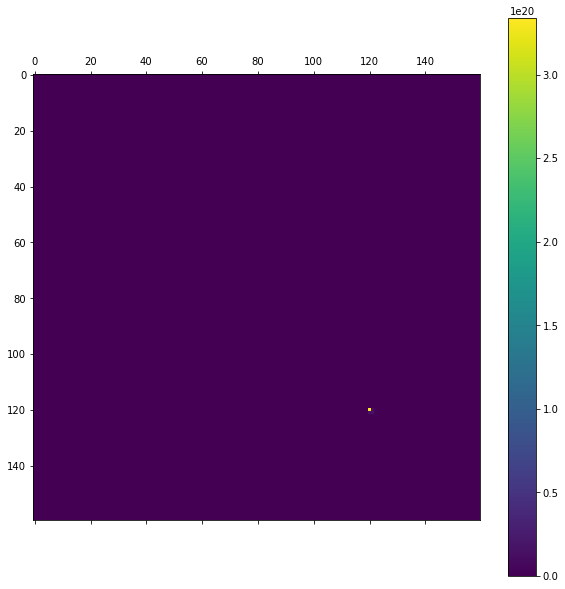

In [6]:
plt.matshow(cov)
plt.colorbar()

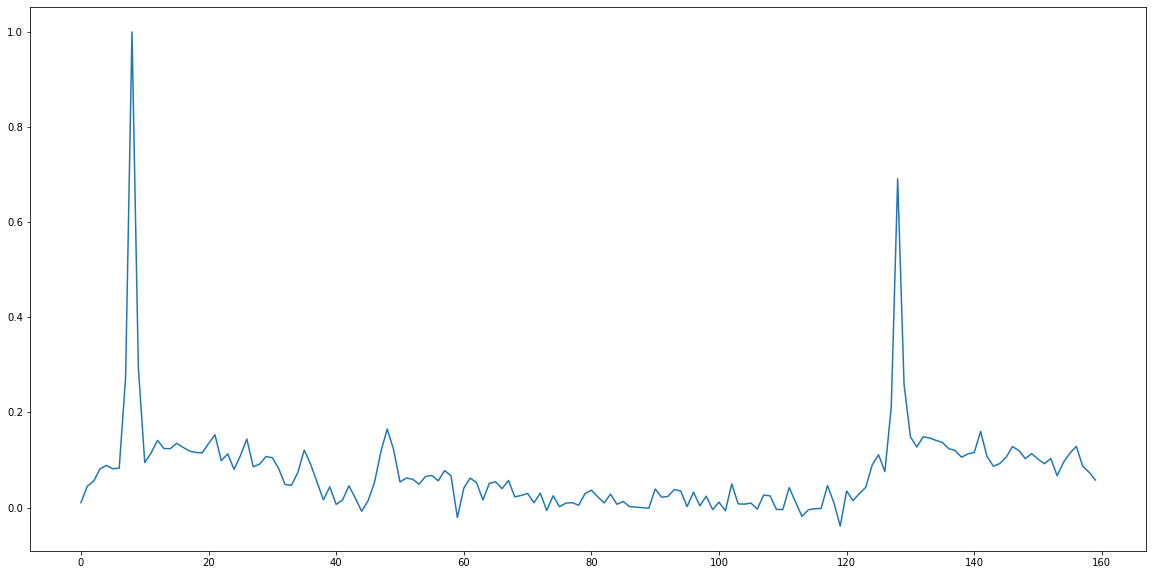

In [7]:
plt.plot(np.arange(len(corr)),corr[8])

In [8]:
plt.matshow(np.diag(corr[:40,120:160]))
plt.colorbar()

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
plt.matshow(data_pk['cov'])
plt.colorbar()

In [9]:
t = data_pk['cov']/np.sqrt(np.diag(data_pk['cov'])[:, np.newaxis])/np.sqrt(np.diag(data_pk['cov']))

NameError: name 'data_pk' is not defined

In [10]:
plt.plot(np.arange(120),data_pk['cov'][20])

NameError: name 'data_pk' is not defined

In [11]:
data_pk['cov']

NameError: name 'data_pk' is not defined

In [12]:
t

NameError: name 't' is not defined

In [13]:
plt.plot(np.arange(120),t[20])
plt.plot(np.arange(160),corr[20])

NameError: name 't' is not defined

In [14]:
plt.matshow(t)
plt.colorbar()

NameError: name 't' is not defined

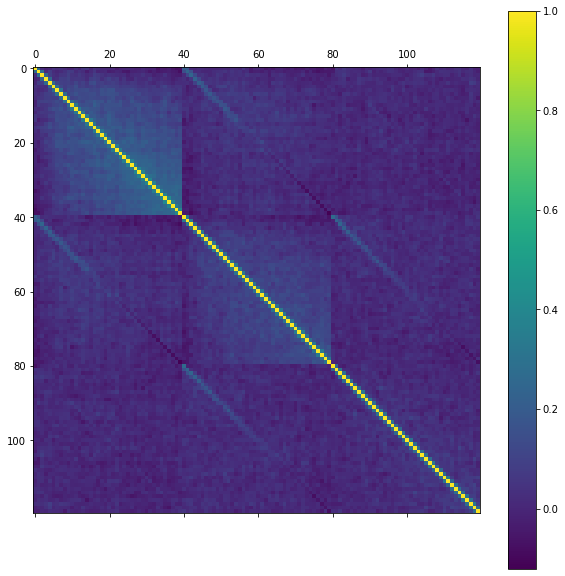

In [15]:
plt.matshow(corr[:120,:120])
plt.colorbar()

In [18]:
to_save = {'nmocks':2048}
to_save['k'] = {'Pk':{'0':data['data_bin_coords'][:40],
                    '2':data['data_bin_coords'][40:80],
                    '4':data['data_bin_coords'][80:120]},
               'Bk':{'000':data['data_bin_coords'][120:]}}
to_save['length_multi'] = [40,40,40,40]
to_save['cov'] = cov

In [21]:
np.save('/home/rneveux/mocks/BOSS/SGC/0.50z0.75/cov_ell_0_2_4_000_k_1_40.npy',to_save)